<ipython-input-1-a99a49971d18>:12: RuntimeWarning: overflow encountered in scalar multiply
  return x * (k - a * y)
<ipython-input-1-a99a49971d18>:15: RuntimeWarning: overflow encountered in scalar multiply
  return -y * (l - b * x)


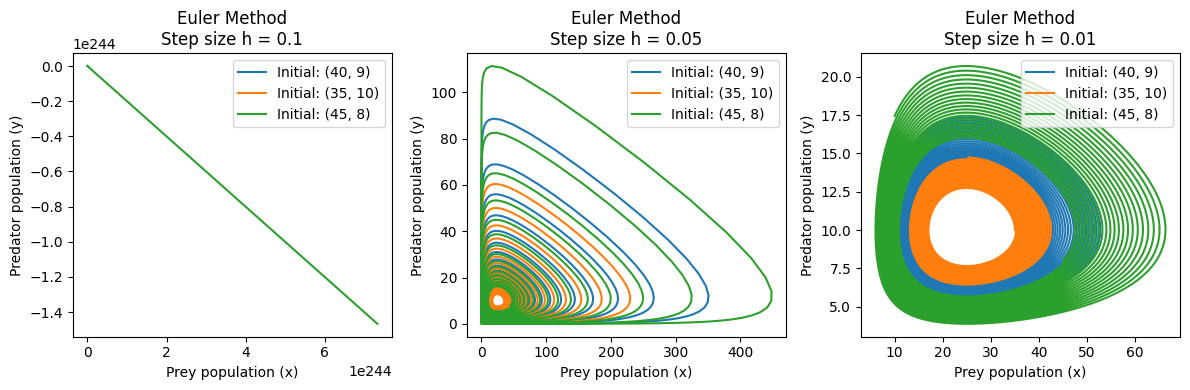

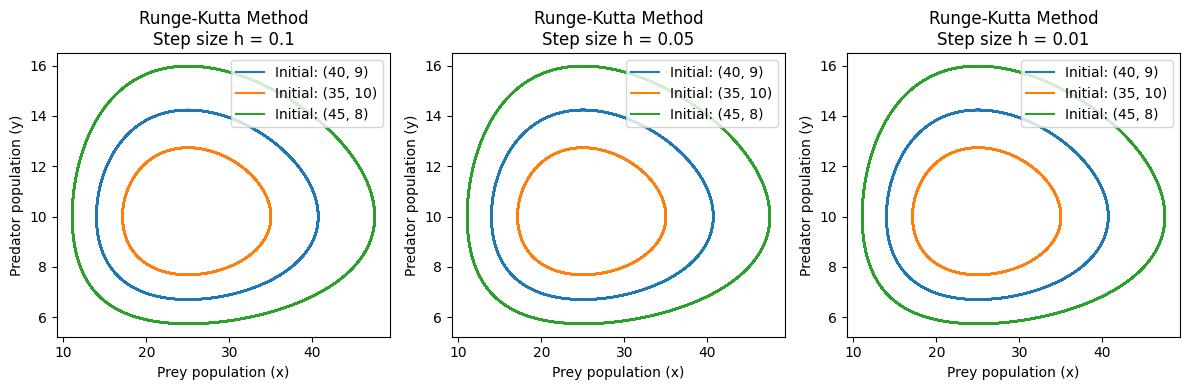

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 1.0
l = 0.5
a = 0.1
b = 0.02

# Lotka-Volterra equations
def f_x(x, y):
    return x * (k - a * y)

def f_y(x, y):
    return -y * (l - b * x)

# Euler's Method
def euler_method(x0, y0, h, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for i in range(1, steps):
        x[i] = x[i-1] + h * f_x(x[i-1], y[i-1])
        y[i] = y[i-1] + h * f_y(x[i-1], y[i-1])
    return x, y

# Runge-Kutta 4th Order Method
def runge_kutta_method(x0, y0, h, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for i in range(1, steps):
        k1x = h * f_x(x[i-1], y[i-1])
        k1y = h * f_y(x[i-1], y[i-1])

        k2x = h * f_x(x[i-1] + 0.5 * k1x, y[i-1] + 0.5 * k1y)
        k2y = h * f_y(x[i-1] + 0.5 * k1x, y[i-1] + 0.5 * k1y)

        k3x = h * f_x(x[i-1] + 0.5 * k2x, y[i-1] + 0.5 * k2y)
        k3y = h * f_y(x[i-1] + 0.5 * k2x, y[i-1] + 0.5 * k2y)

        k4x = h * f_x(x[i-1] + k3x, y[i-1] + k3y)
        k4y = h * f_y(x[i-1] + k3x, y[i-1] + k3y)

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        y[i] = y[i-1] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    return x, y

# Simulation parameters
h_values = [0.1, 0.05, 0.01]
methods = {'Euler': euler_method, 'Runge-Kutta': runge_kutta_method}
initial_conditions = [(40, 9), (35, 10), (45, 8)]

for method_name, method in methods.items():
    plt.figure(figsize=(12, 4))
    for idx, h in enumerate(h_values):
        plt.subplot(1, len(h_values), idx+1)
        for x0, y0 in initial_conditions:
            steps = int(200 / h)
            x, y = method(x0, y0, h, steps)
            plt.plot(x, y, label=f'Initial: ({x0}, {y0})')
        plt.title(f'{method_name} Method\nStep size h = {h}')
        plt.xlabel('Prey population (x)')
        plt.ylabel('Predator population (y)')
        plt.legend()
        plt.tight_layout()
    plt.show()
